In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("post_pandemic_remote_work_health_impact_2025.csv")

# Data structure and quality check

In [3]:
df.head()

,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Medium,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,NaN,Medium,5,NaN,4,$60K-80K


In [4]:
df.shape

(3157, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Survey_Date              3157 non-null   object
 1   Age                      3157 non-null   int64 
 2   Gender                   3157 non-null   object
 3   Region                   3157 non-null   object
 4   Industry                 3157 non-null   object
 5   Job_Role                 3157 non-null   object
 6   Work_Arrangement         3157 non-null   object
 7   Hours_Per_Week           3157 non-null   int64 
 8   Mental_Health_Status     2358 non-null   object
 9   Burnout_Level            3157 non-null   object
 10  Work_Life_Balance_Score  3157 non-null   int64 
 11  Physical_Health_Issues   2877 non-null   object
 12  Social_Isolation_Score   3157 non-null   int64 
 13  Salary_Range             3157 non-null   object
dtypes: int64(4), object(10)
memory usage: 34

In [6]:
df.nunique()

,0
Survey_Date,26
Age,44
Gender,4
Region,6
Industry,9
Job_Role,24
Work_Arrangement,3
Hours_Per_Week,31
Mental_Health_Status,6
Burnout_Level,3


In [7]:
df.describe()

,Age,Hours_Per_Week,Work_Life_Balance_Score,Social_Isolation_Score
count,3157.000000,3157.000000,3157.000000,3157.000000
mean,43.732024,49.904973,2.996516,2.704783
std,12.661095,8.897699,1.163307,1.188887
min,22.000000,35.000000,1.000000,1.000000
25%,33.000000,42.000000,2.000000,2.000000
50%,44.000000,50.000000,3.000000,3.000000
75%,55.000000,57.000000,4.000000,4.000000
max,65.000000,65.000000,5.000000,5.000000


In [8]:
df.describe(include="object")

,Survey_Date,Gender,Region,Industry,Job_Role,Work_Arrangement,Mental_Health_Status,Burnout_Level,Physical_Health_Issues,Salary_Range
count,3157,3157,3157,3157,3157,3157,2358,3157,2877,3157
unique,26,4,6,9,24,3,6,3,31,5
top,2025-06-07,Male,South America,Professional Services,Research Scientist,Onsite,PTSD,Medium,Shoulder Pain; Eye Strain,$60K-80K
freq,137,1535,575,730,151,1562,423,1366,262,1014


## Check for and remove any duplicate rows in the dataset

In [9]:
# Check for duplicates
print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates found: 0


## Create Binary Burnout_Level intead of Multiple.

In [10]:
# Create a binary target variable
df['Burnout_Level'] = df['Burnout_Level'].apply(lambda x: "High Burnout" if x == 'High' else "Low Burnout")

# Display the value counts of the new column to verify
print(df['Burnout_Level'].value_counts())

Burnout_Level
Low Burnout     2111
High Burnout    1046
Name: count, dtype: int64


# Initial visualizations (before handling missing data)

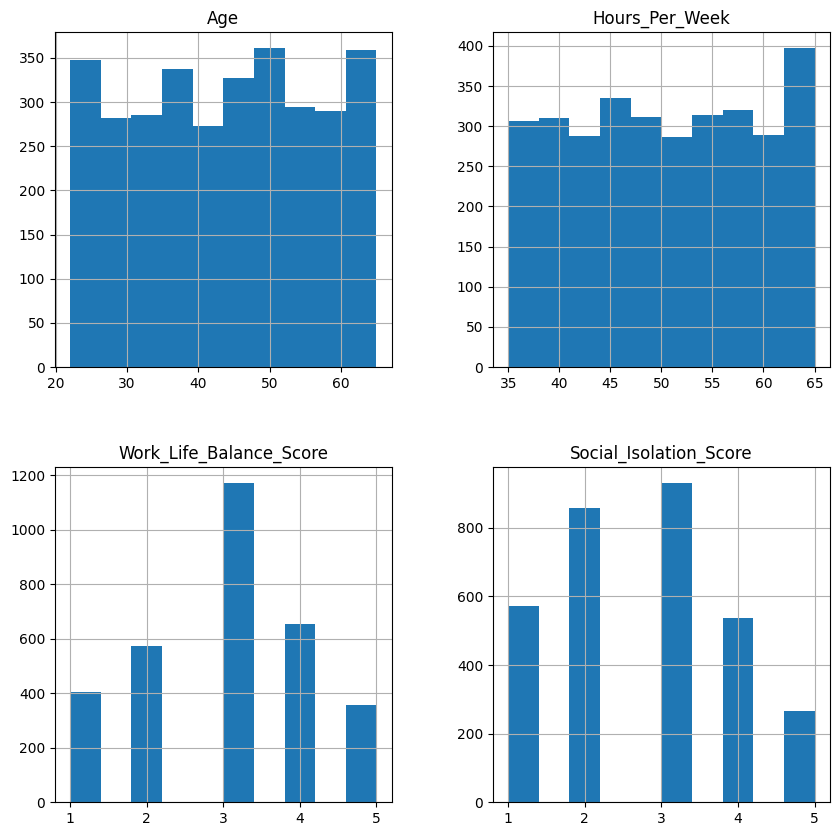

In [11]:
# Generate histograms for all numerical columns
df.hist(figsize=(10, 10))
plt.show()

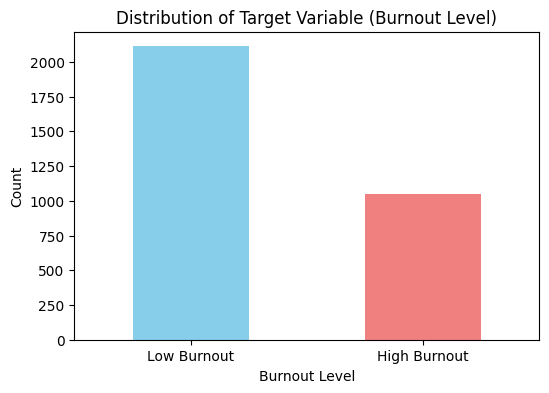

In [12]:
# Create a bar chart for the target variable "Burnout_Level"

plt.figure(figsize=(6, 4))
df['Burnout_Level'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Target Variable (Burnout Level)')
plt.xlabel('Burnout Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Histograms for all numerical columns to visualize their distributions

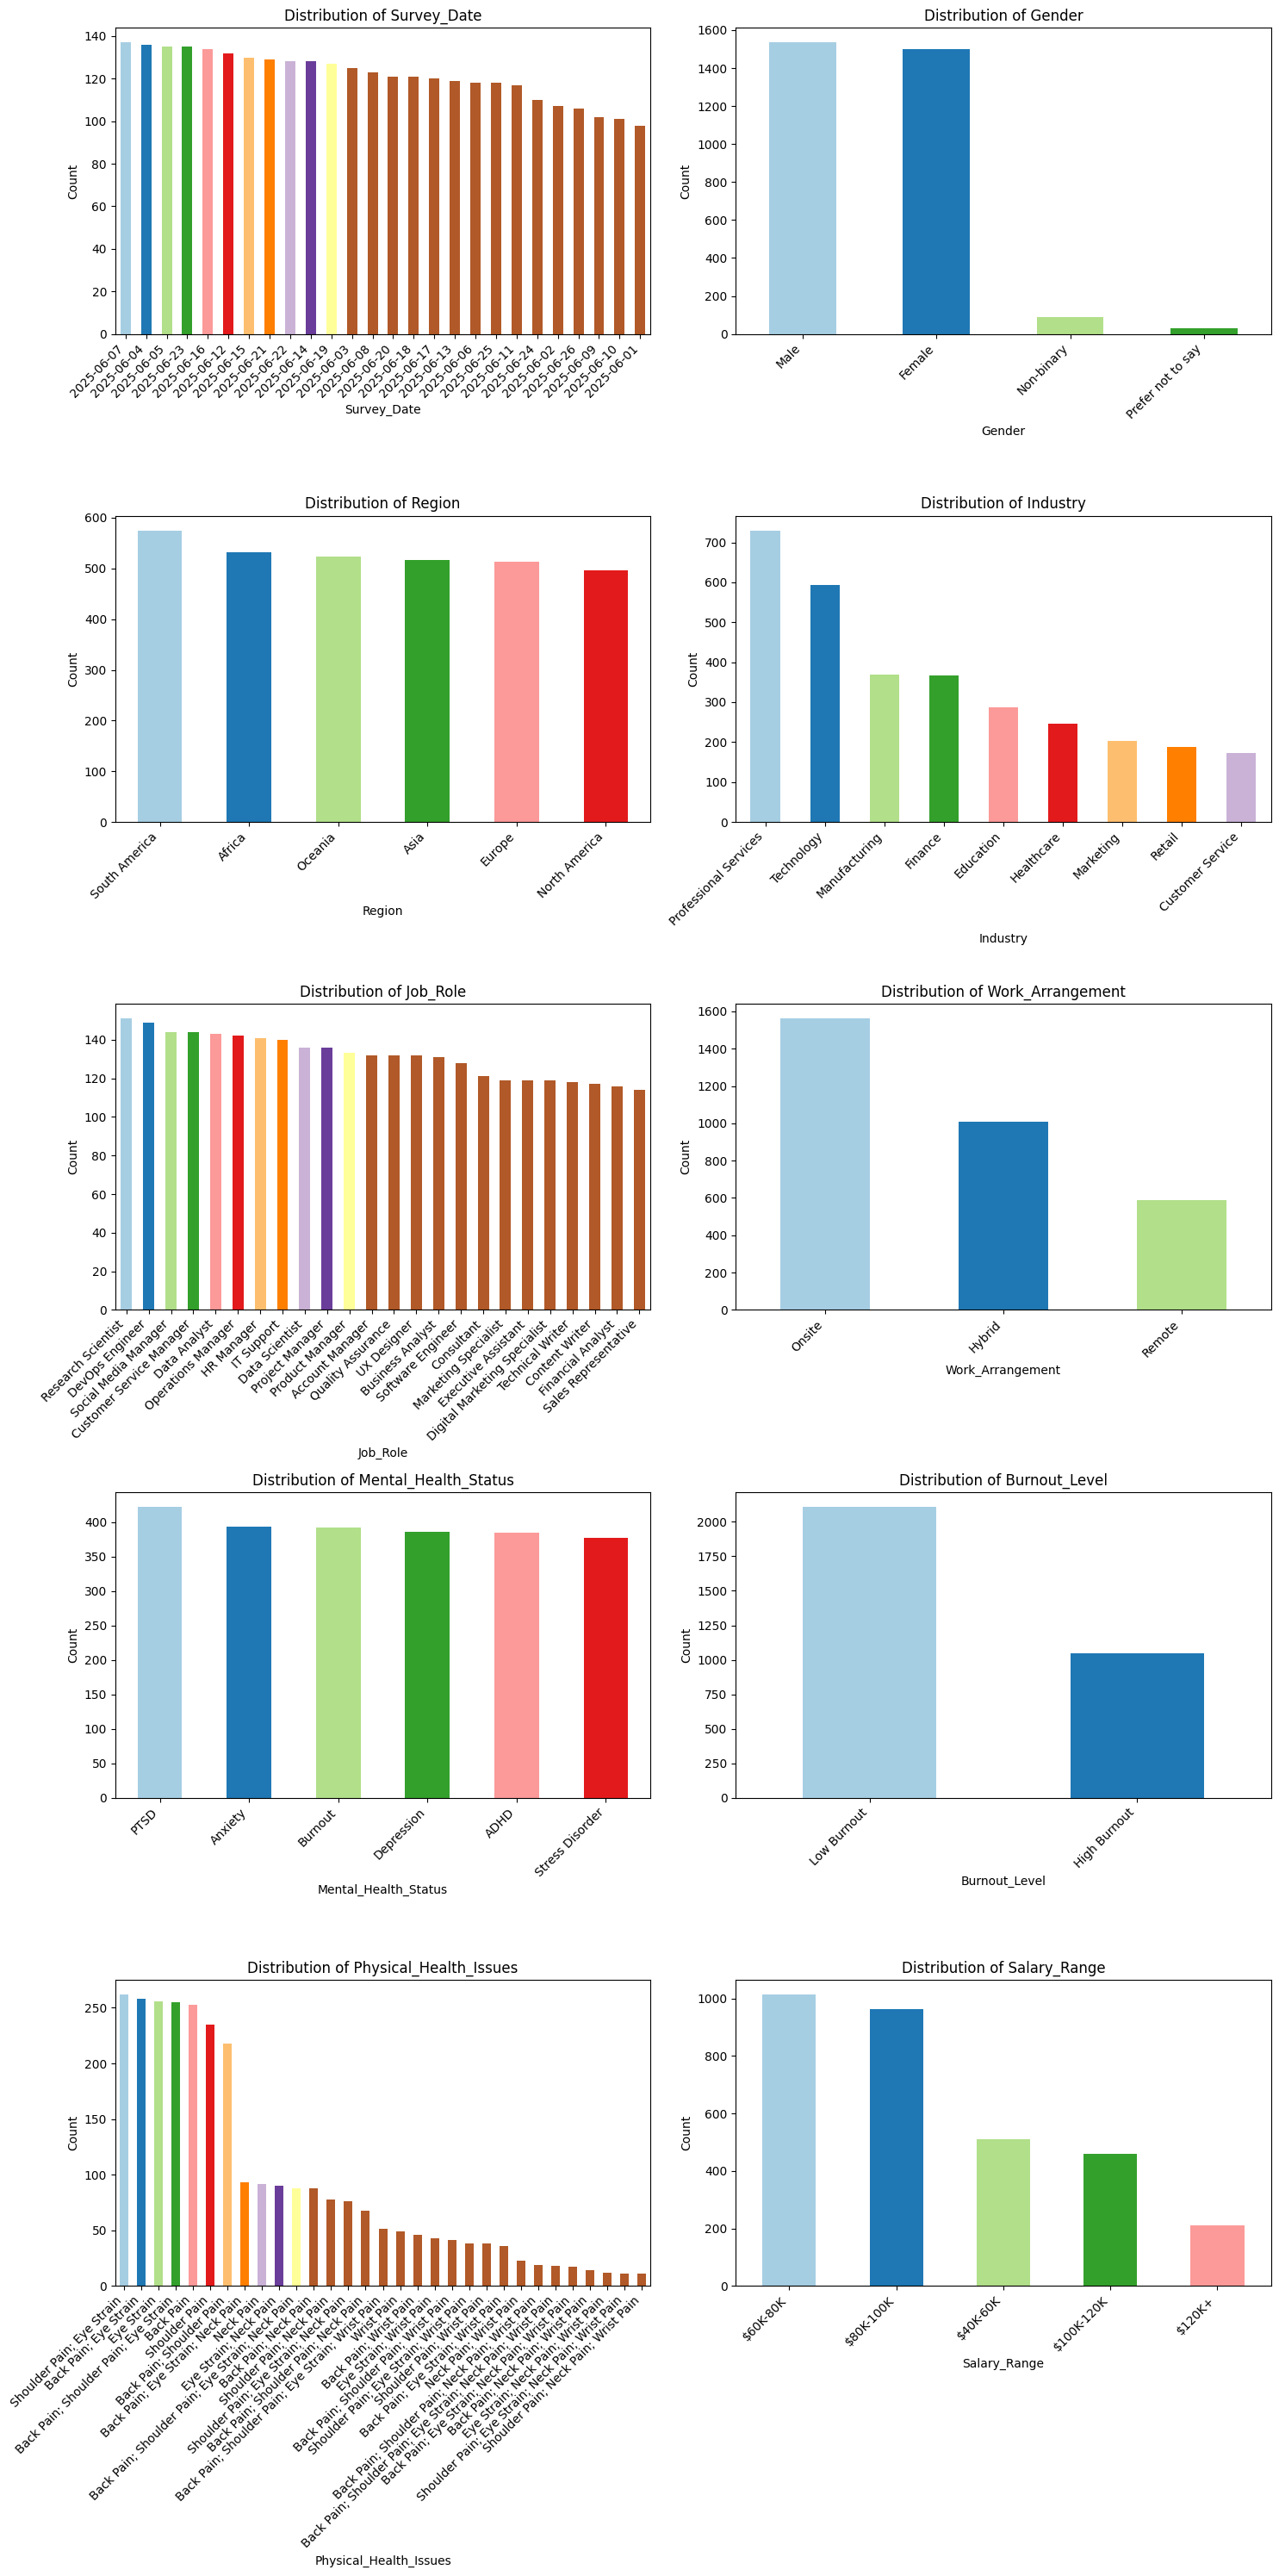

In [13]:
# Create bar charts for key categorical variables
categorical_cols_for_bar = df.select_dtypes(include='object').columns



num_cols_bar = len(categorical_cols_for_bar)
n_rows_bar = (num_cols_bar + 1) // 2 # Arrange in 2 columns
plt.figure(figsize=(15, n_rows_bar * 6))
for i, col in enumerate(categorical_cols_for_bar):
    plt.subplot(n_rows_bar, 2, i + 1)
    df[col].value_counts().plot(kind='bar', color=plt.cm.Paired(np.arange(len(df[col].unique()))))
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Histogram of each Feature against Target (Burnout_Level)

Numerical columns: Index(['Age', 'Hours_Per_Week', 'Work_Life_Balance_Score',
       'Social_Isolation_Score'],
      dtype='object')
Categorical columns: Index(['Survey_Date', 'Gender', 'Region', 'Industry', 'Job_Role',
       'Work_Arrangement', 'Mental_Health_Status', 'Burnout_Level',
       'Physical_Health_Issues', 'Salary_Range'],
      dtype='object')


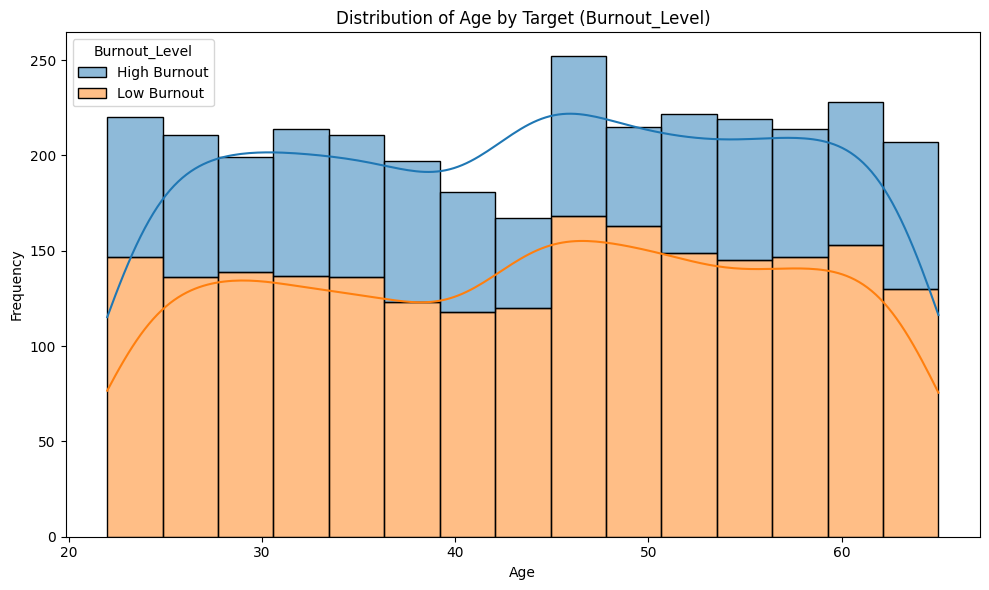

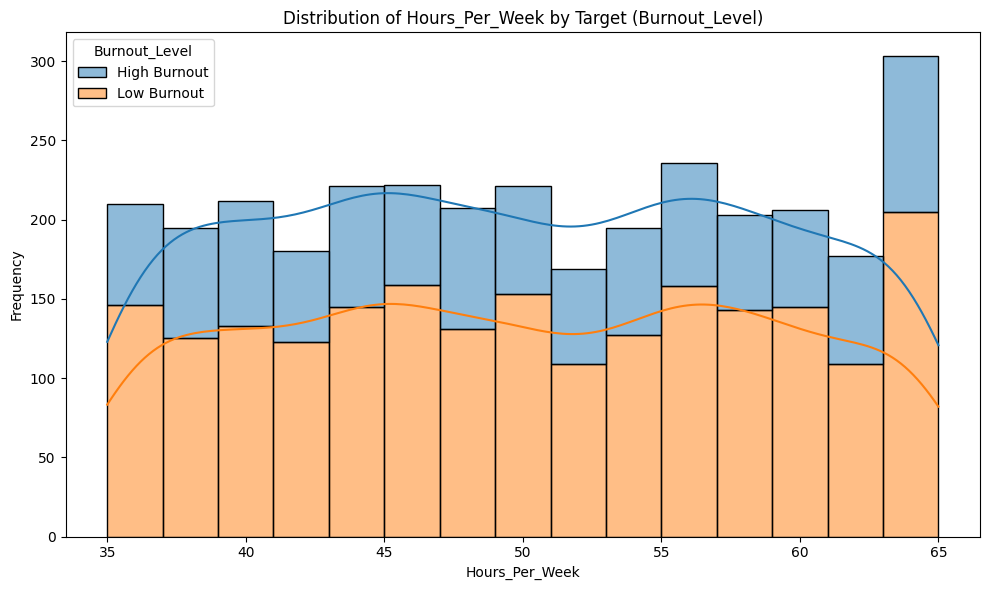

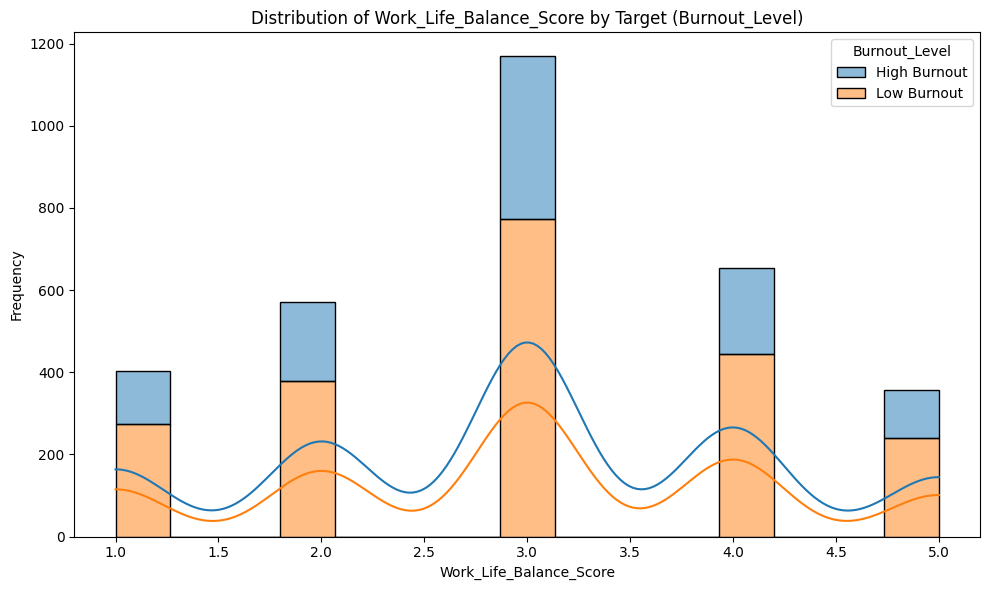

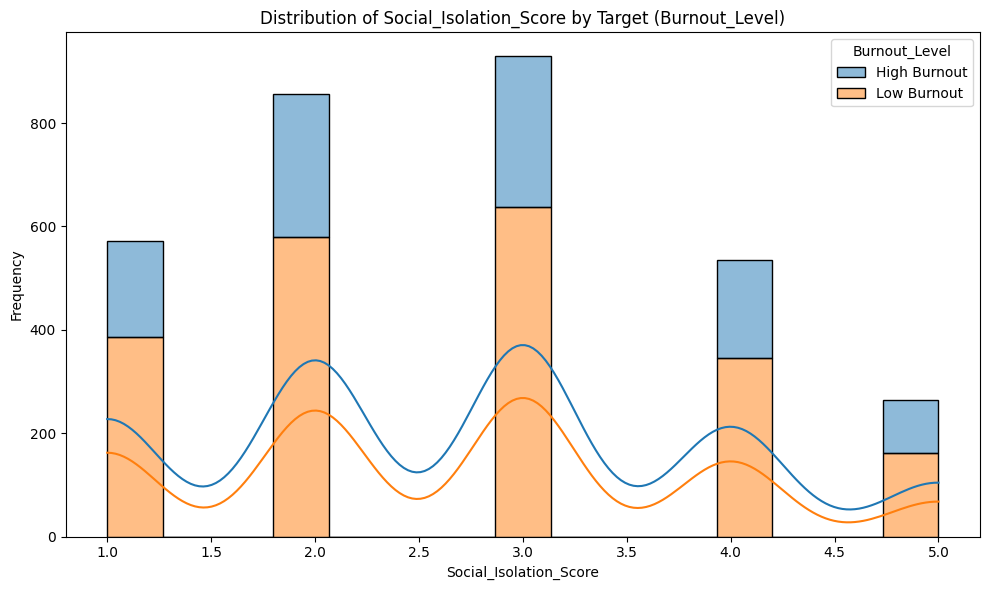

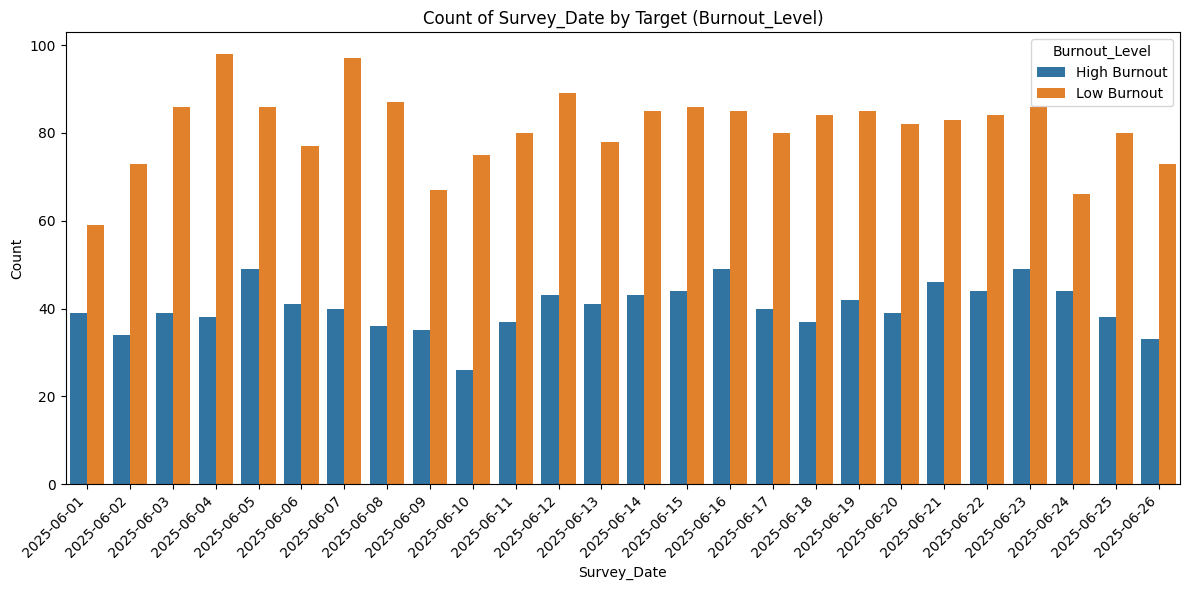

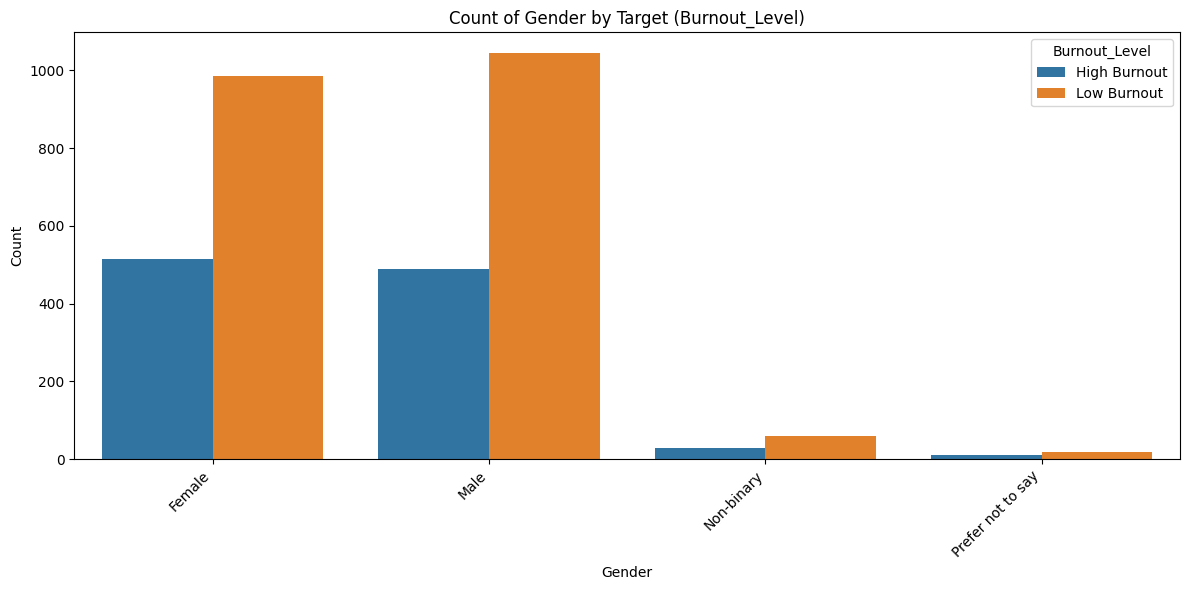

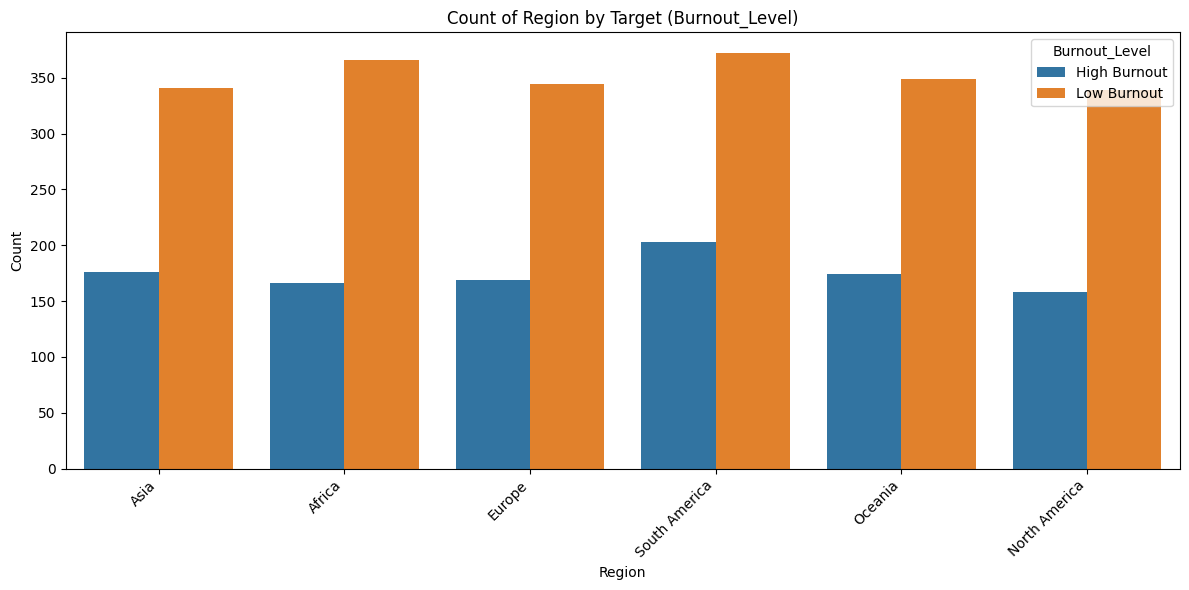

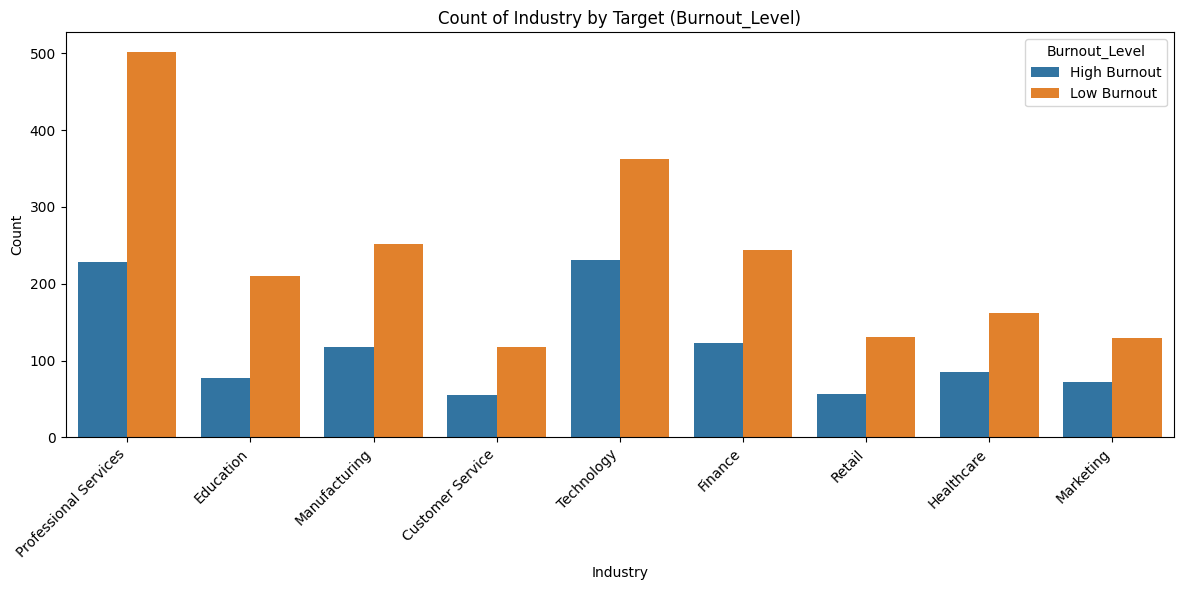

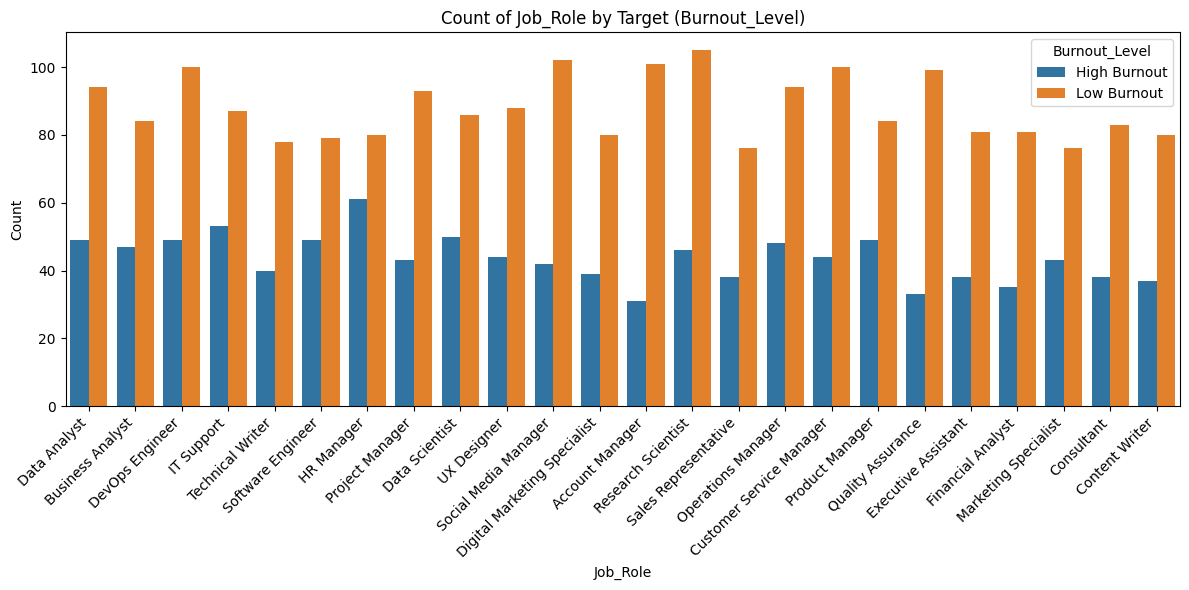

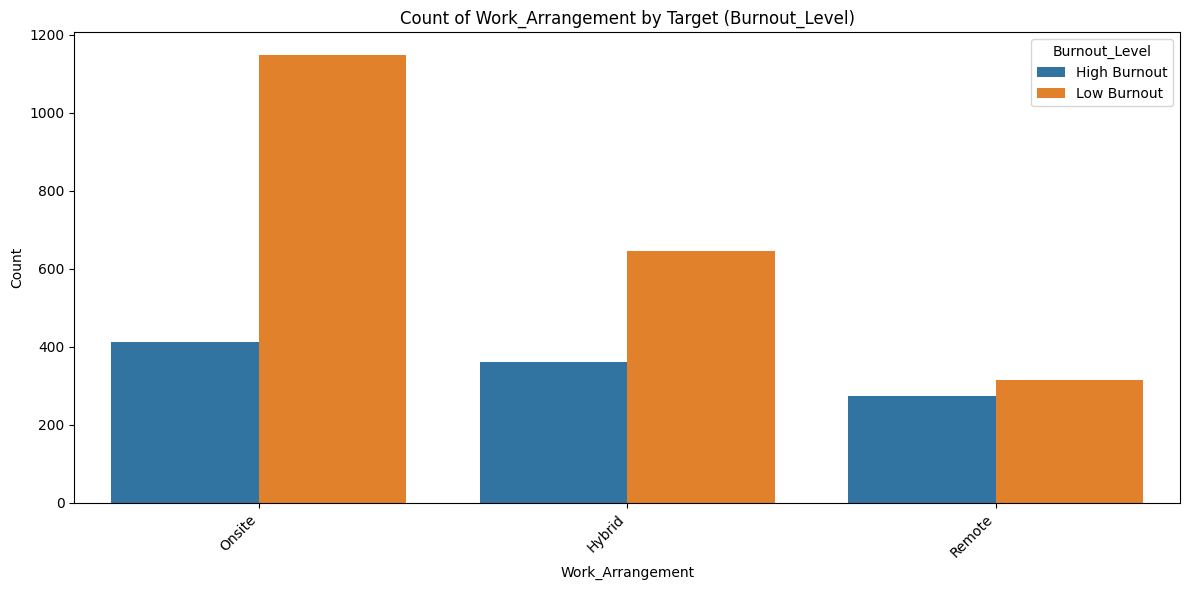

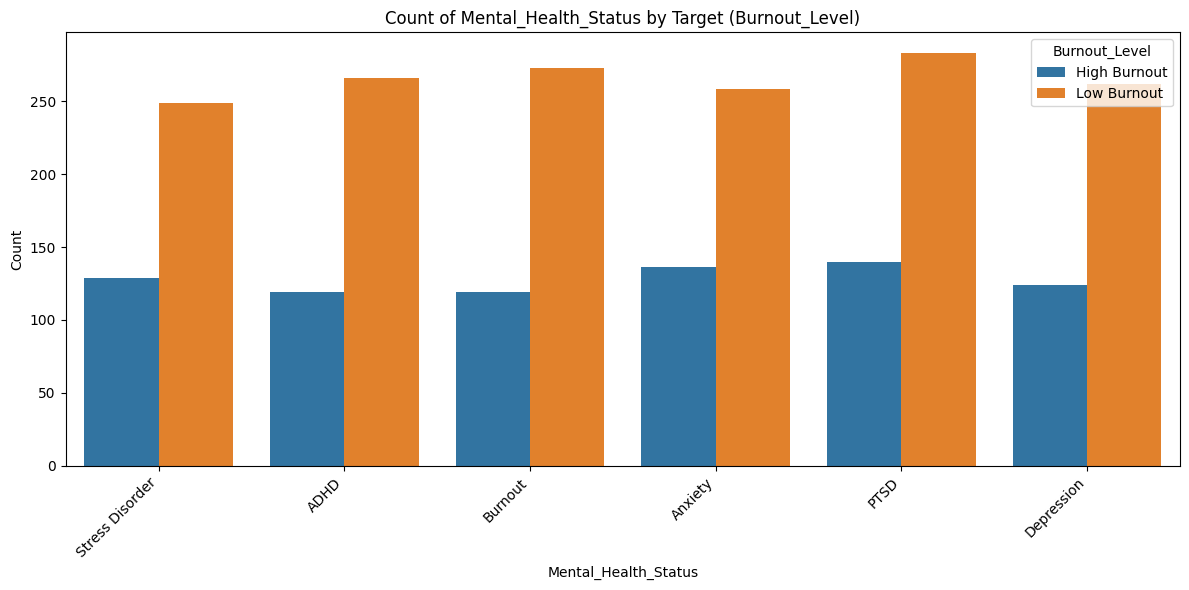

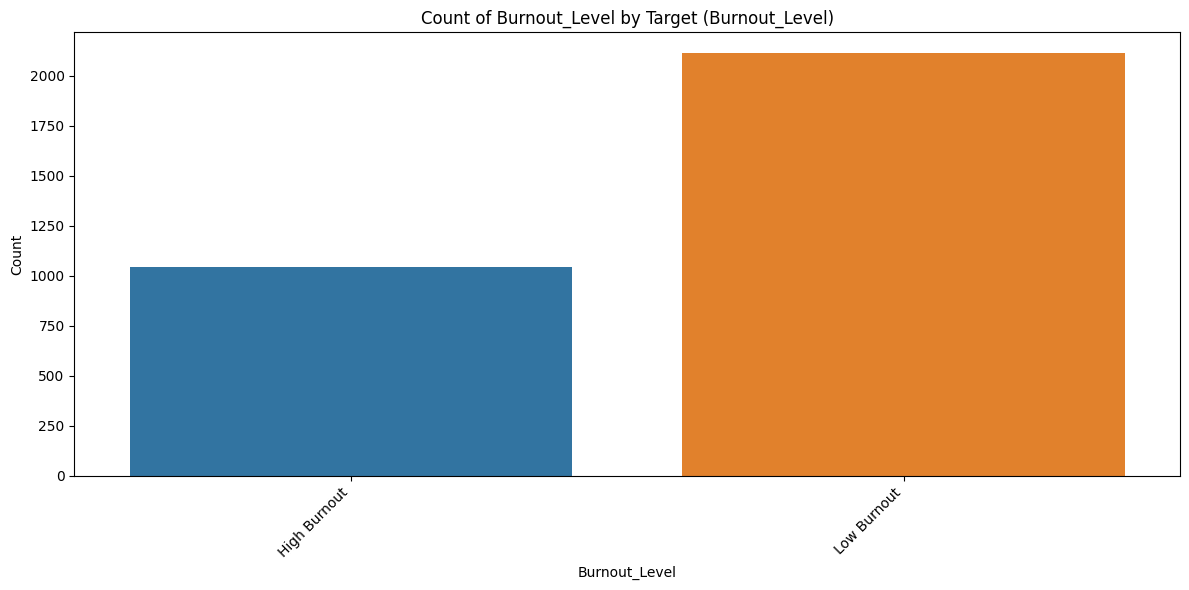

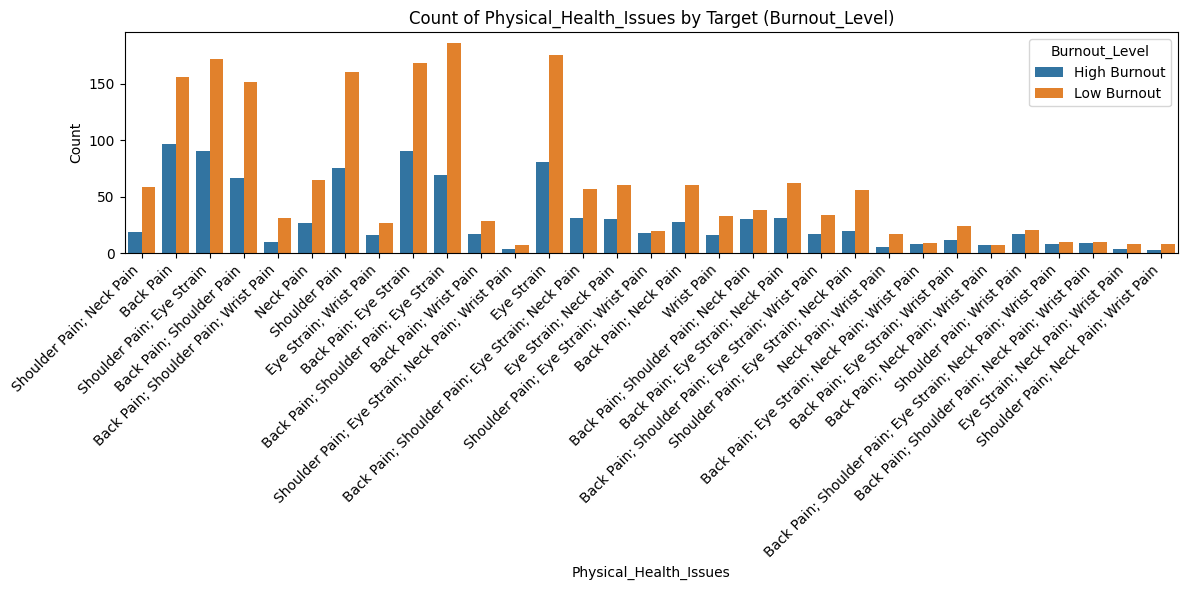

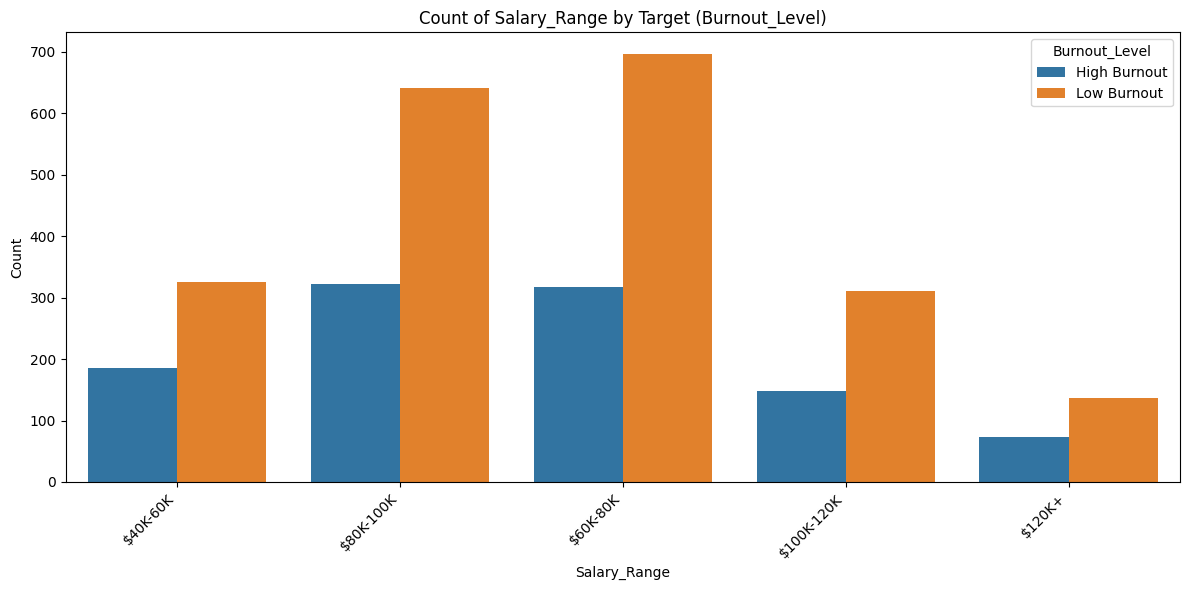

In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, hue='Burnout_Level', multiple='stack', kde=True)
    plt.title(f'Distribution of {col} by Target (Burnout_Level)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout() # Added tight_layout for better spacing
    plt.show()



for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, hue='Burnout_Level')
    plt.title(f'Count of {col} by Target (Burnout_Level)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# **3. Missing Values**

In [15]:
# Missing values table
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

Missing values per column:
 Survey_Date                  0
Age                          0
Gender                       0
Region                       0
Industry                     0
Job_Role                     0
Work_Arrangement             0
Hours_Per_Week               0
Mental_Health_Status       799
Burnout_Level                0
Work_Life_Balance_Score      0
Physical_Health_Issues     280
Social_Isolation_Score       0
Salary_Range                 0
dtype: int64


In [16]:
# Impute median for numeric, mode for categorical
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype.name == 'category' or df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
df.isnull().sum()

,0
Survey_Date,0
Age,0
Gender,0
Region,0
Industry,0
Job_Role,0
Work_Arrangement,0
Hours_Per_Week,0
Mental_Health_Status,0
Burnout_Level,0


# **4. Outliers**

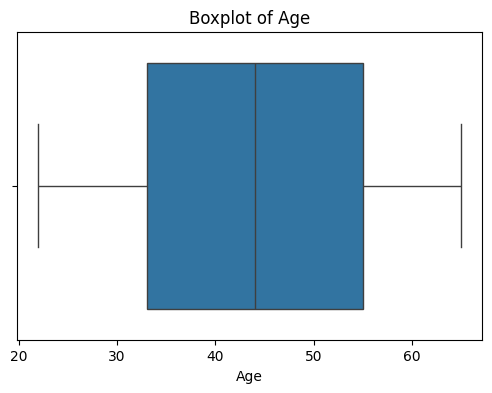

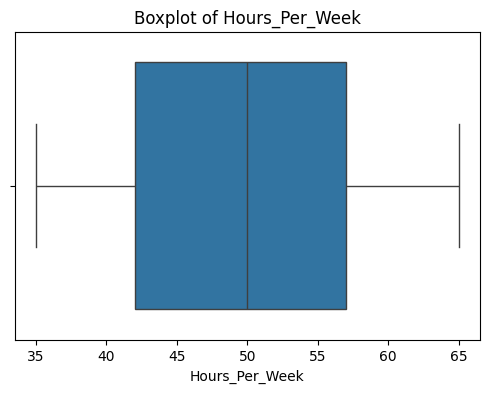

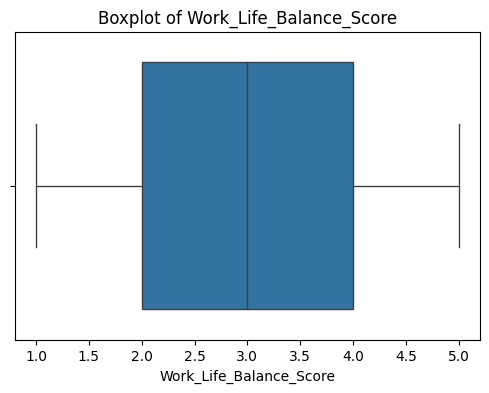

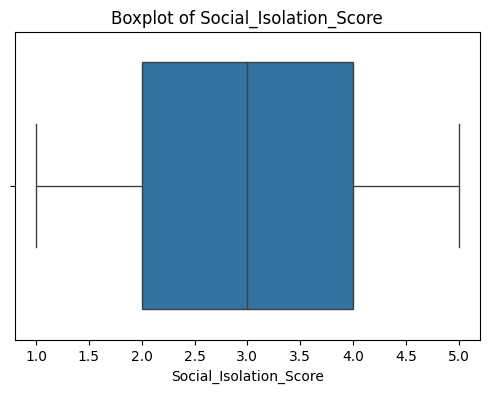

In [17]:
# Boxplots for numerics to spot outliers
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [18]:
# Standard deviation method
for col in numeric_cols:
    outliers = df[(np.abs(df[col] - df[col].mean()) > 3 * df[col].std())]
    print(f"{col}: {len(outliers)} outliers ")

Age: 0 outliers 
Hours_Per_Week: 0 outliers 
Work_Life_Balance_Score: 0 outliers 
Social_Isolation_Score: 0 outliers 


# **5. Visualizations**

Visualizations after handling missing data and outliers

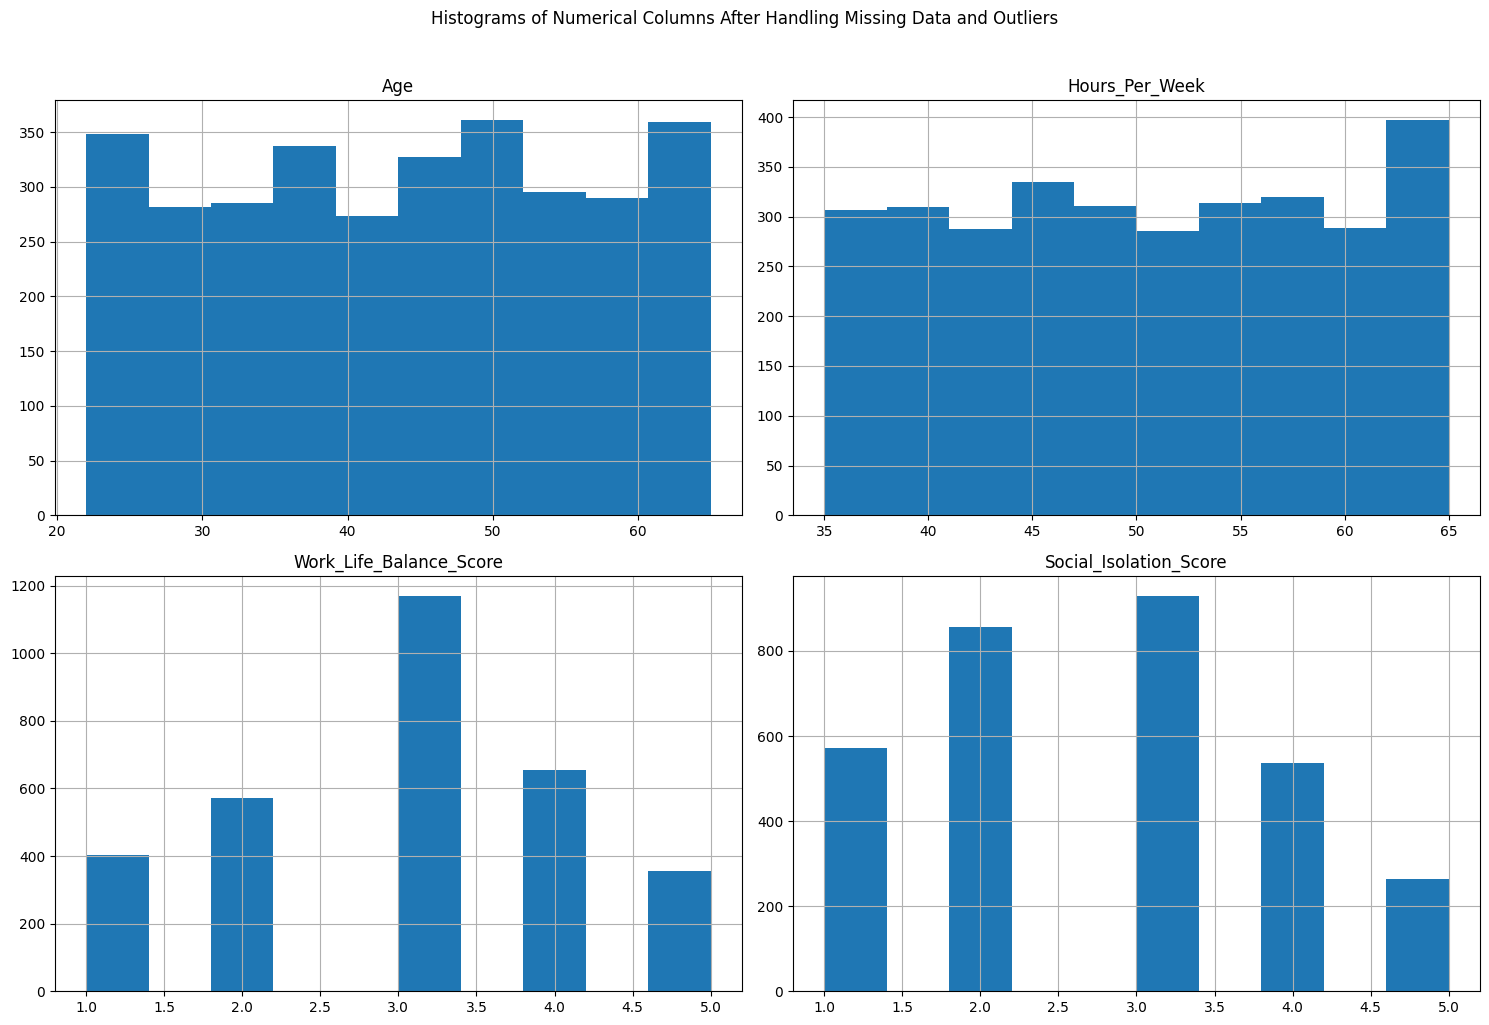

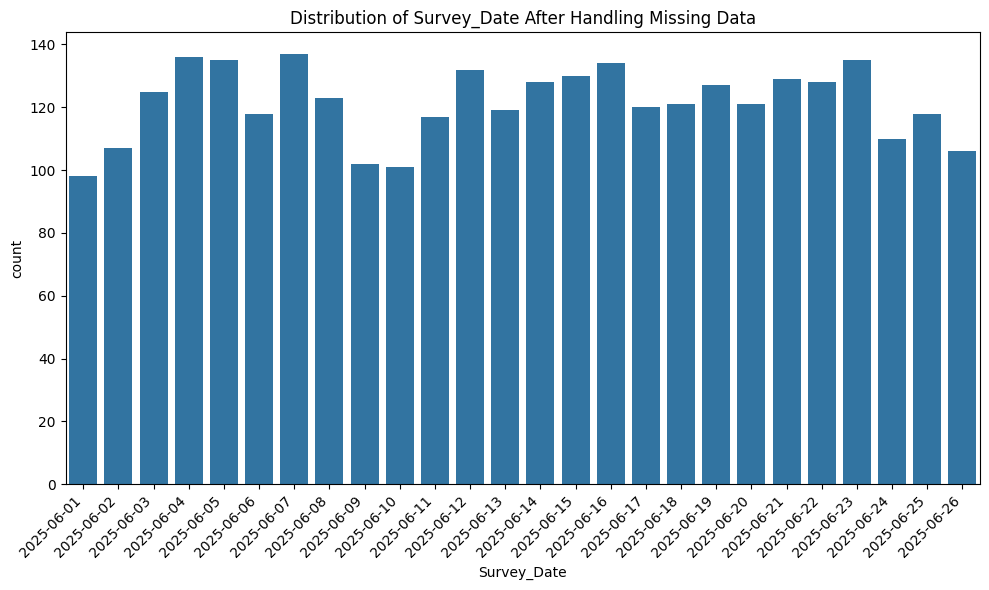

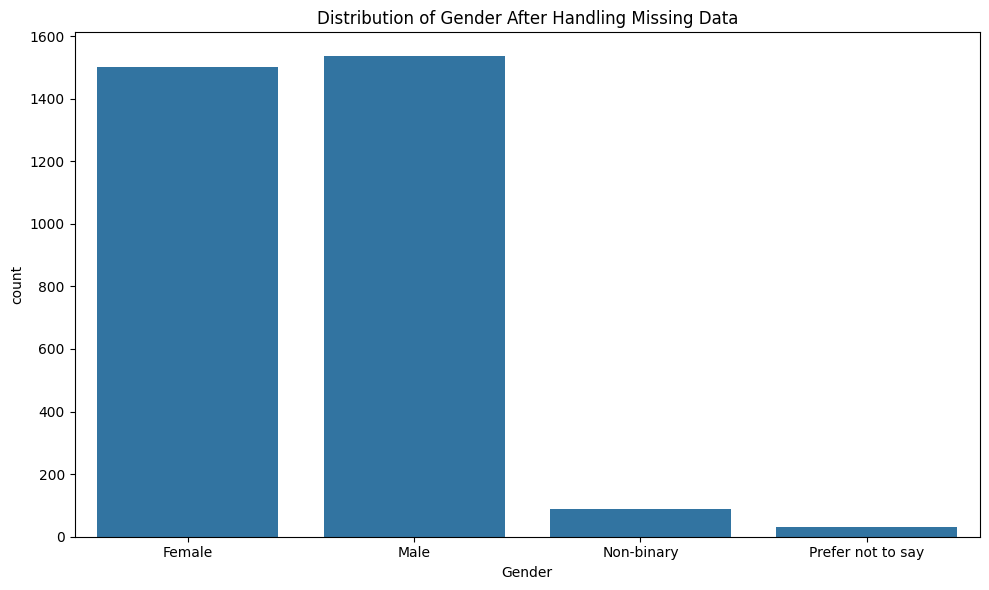

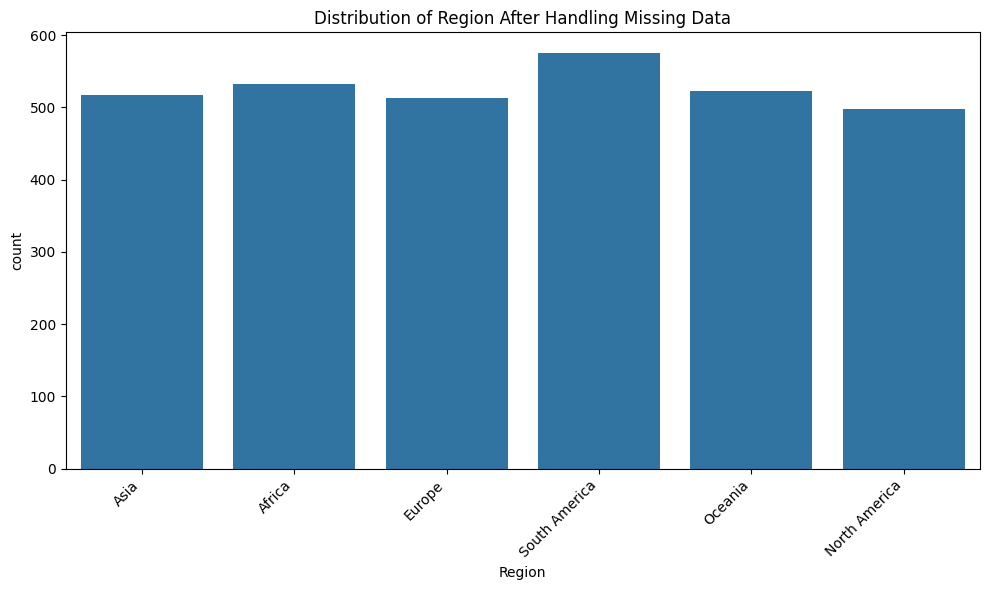

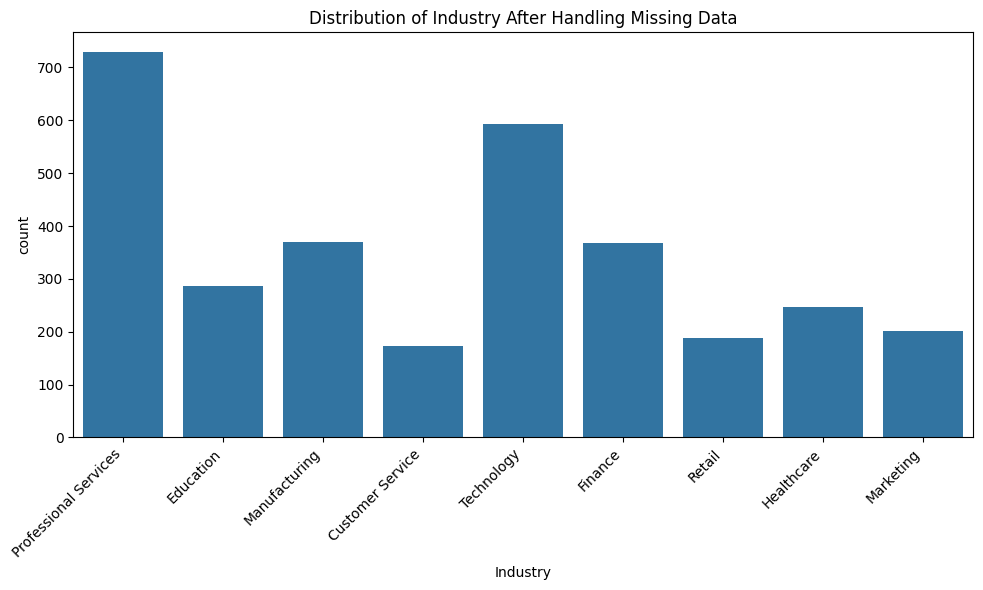

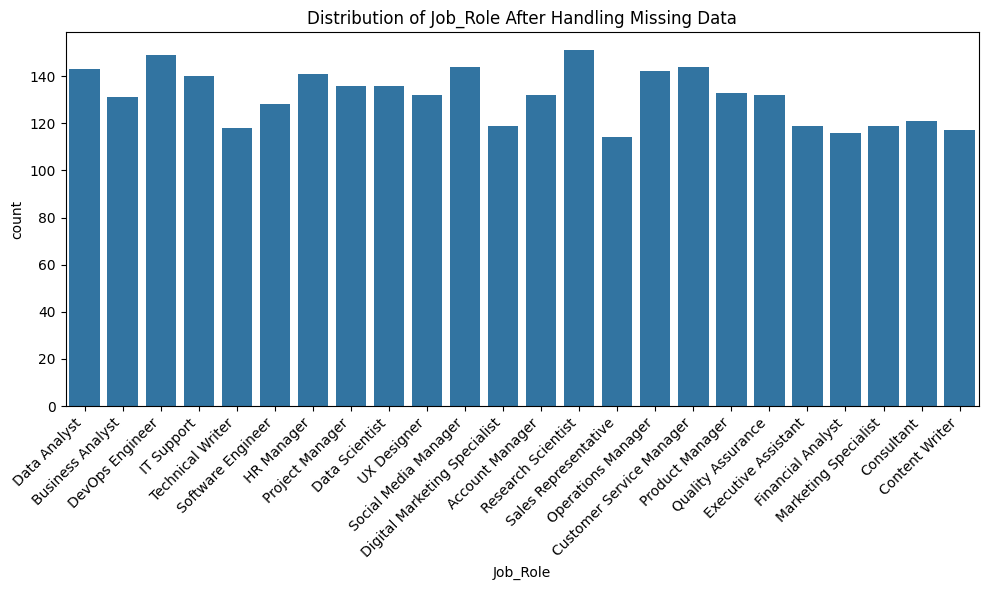

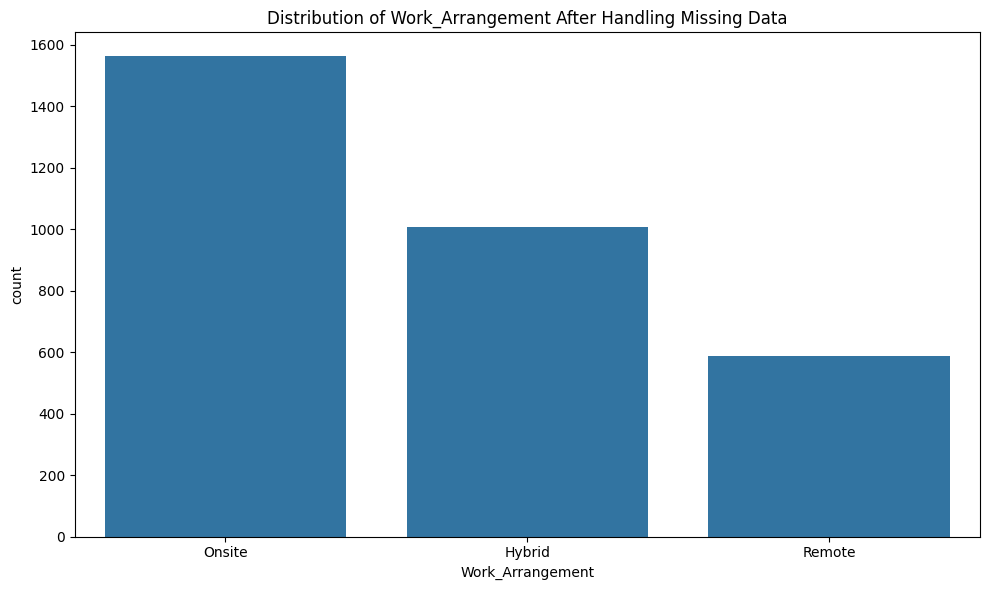

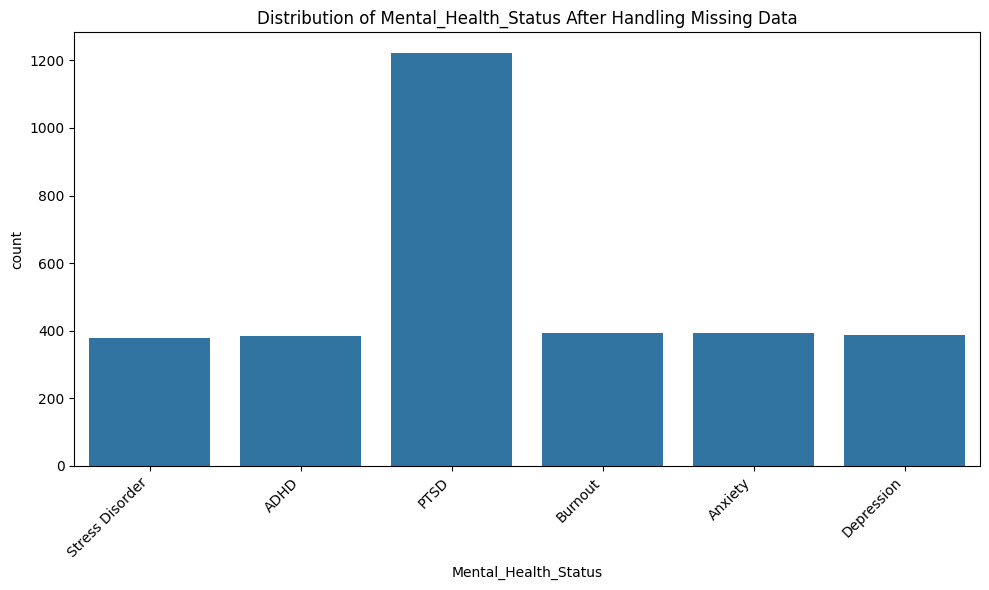

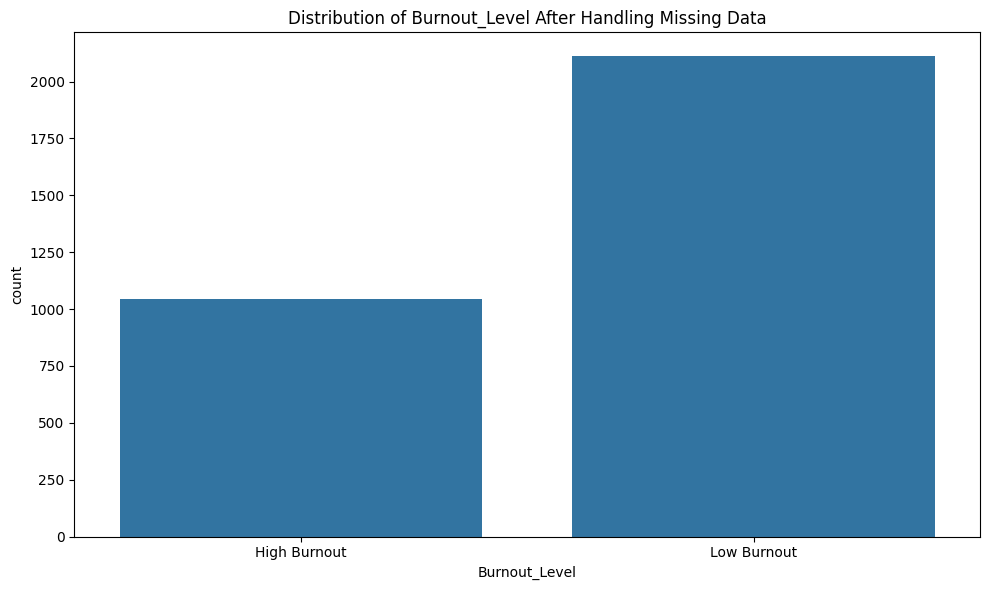

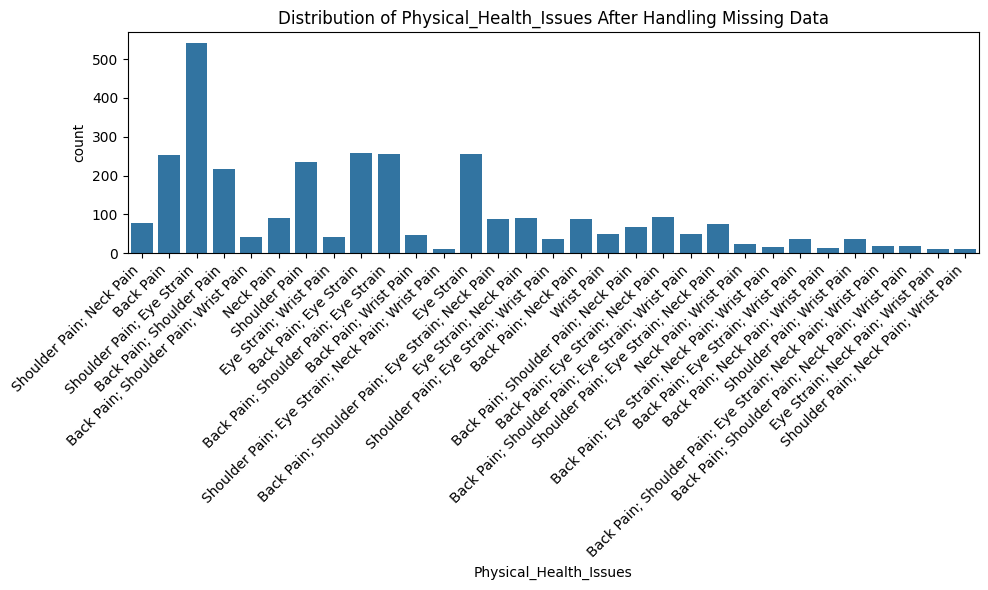

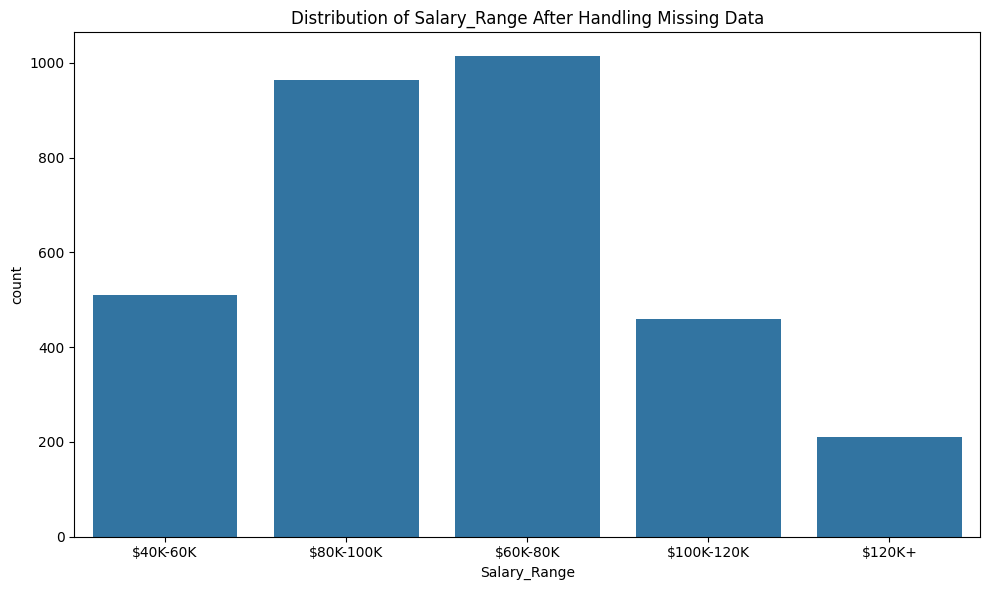

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical columns
numerical_cols_after_handling = df.select_dtypes(include=np.number).columns.tolist()
df[numerical_cols_after_handling].hist(figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns After Handling Missing Data and Outliers', y=1.02)
plt.tight_layout()
plt.show()

# Bar charts for categorical columns (including new missing indicators)
categorical_cols_after_handling = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols_after_handling:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    if df[col].nunique() > 5:
        plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {col} After Handling Missing Data')
    plt.tight_layout()
    plt.show()

Correlation Analysis

Identify highly correlated numerical variables, calculate their correlation with the target variable

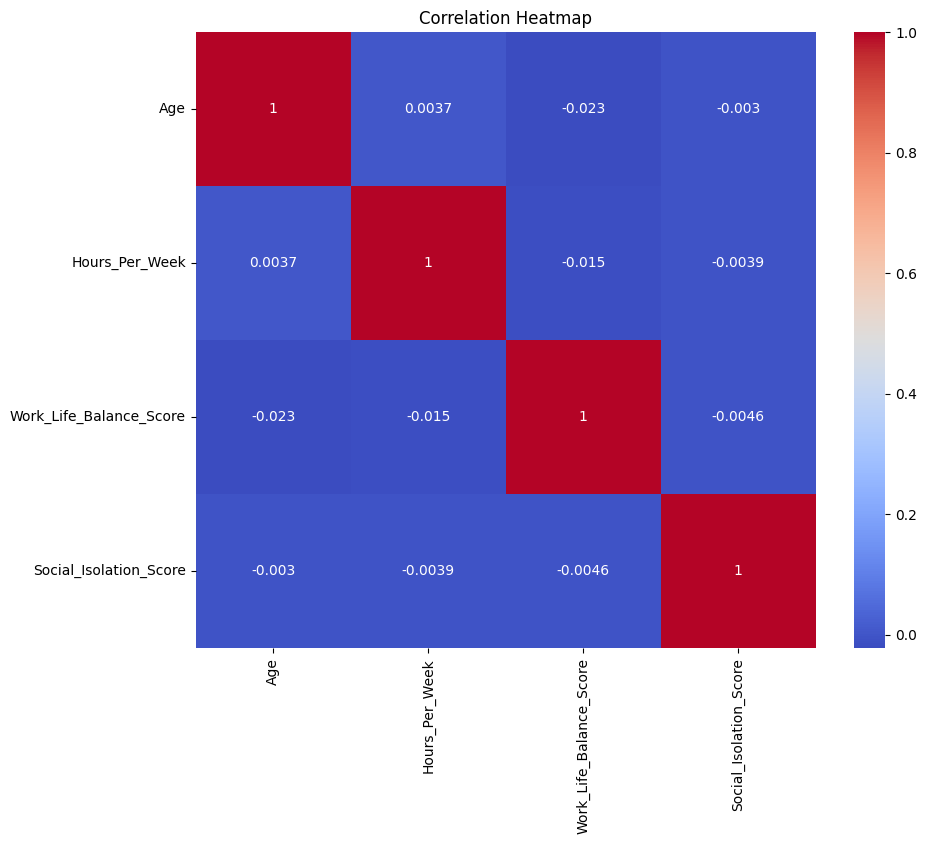

In [20]:
# Show heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **6. Skewness**

In [21]:
# Skewness of numeric features
for col in numeric_cols:
    print(f"{col} skewness: {df[col].skew():.2f}")


Age skewness: -0.04
Hours_Per_Week skewness: 0.02
Work_Life_Balance_Score skewness: -0.05
Social_Isolation_Score skewness: 0.24


# **7. Variable Handling & Relationships**

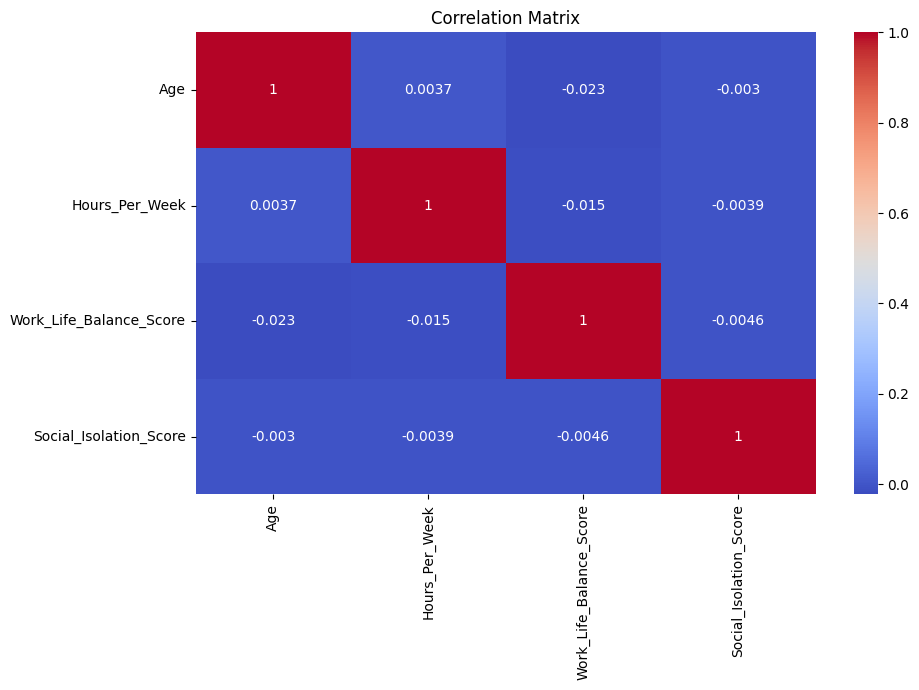

In [22]:
# Pearson correlation (heatmap)
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# Chi-square tests for all categorical-categorical pairs
from scipy.stats import chi2_contingency
from itertools import combinations

cat_pairs = list(combinations([col for col in categorical_cols if col in df.columns], 2))
for c1, c2 in cat_pairs:
    contingency = pd.crosstab(df[c1], df[c2])
    if contingency.shape[0] > 1 and contingency.shape[1] > 1:
        chi2, p, _, _ = chi2_contingency(contingency)
        print(f"Chi-square {c1} vs {c2}: p={p:.4f}")

Chi-square Survey_Date vs Gender: p=0.2458
Chi-square Survey_Date vs Region: p=0.5842
Chi-square Survey_Date vs Industry: p=0.4882
Chi-square Survey_Date vs Job_Role: p=0.9229
Chi-square Survey_Date vs Work_Arrangement: p=0.7054
Chi-square Survey_Date vs Mental_Health_Status: p=0.9001
Chi-square Survey_Date vs Burnout_Level: p=0.9609
Chi-square Survey_Date vs Physical_Health_Issues: p=0.6681
Chi-square Survey_Date vs Salary_Range: p=0.5000
Chi-square Gender vs Region: p=0.0580
Chi-square Gender vs Industry: p=0.7592
Chi-square Gender vs Job_Role: p=0.5810
Chi-square Gender vs Work_Arrangement: p=0.4383
Chi-square Gender vs Mental_Health_Status: p=0.2117
Chi-square Gender vs Burnout_Level: p=0.5123
Chi-square Gender vs Physical_Health_Issues: p=0.0870
Chi-square Gender vs Salary_Range: p=0.6755
Chi-square Region vs Industry: p=0.8964
Chi-square Region vs Job_Role: p=0.7360
Chi-square Region vs Work_Arrangement: p=0.9186
Chi-square Region vs Mental_Health_Status: p=0.1592
Chi-square Regi

In [24]:
# ANOVA for numeric vs. categorical (target)
from scipy.stats import f_oneway

for col in numeric_cols:
    groups = [df[df['Burnout_Level'] == g][col] for g in df['Burnout_Level'].unique()]
    f, p = f_oneway(*groups)
    print(f"ANOVA {col} by Burnout_Level: p={p:.4f}")


ANOVA Age by Burnout_Level: p=0.6335
ANOVA Hours_Per_Week by Burnout_Level: p=0.6598
ANOVA Work_Life_Balance_Score by Burnout_Level: p=0.8111
ANOVA Social_Isolation_Score by Burnout_Level: p=0.0531


In [25]:
# Final Data Structure


In [28]:
print("Cleaned DataFrame head:")
display(df.head())

print("\nShape of Cleaned DataFrame:")
display(df.shape)


Cleaned DataFrame head:


,Survey_Date,Age,Gender,Region,Industry,Job_Role,Work_Arrangement,Hours_Per_Week,Mental_Health_Status,Burnout_Level,Work_Life_Balance_Score,Physical_Health_Issues,Social_Isolation_Score,Salary_Range
0,2025-06-01,27,Female,Asia,Professional Services,Data Analyst,Onsite,64,Stress Disorder,High Burnout,3,Shoulder Pain; Neck Pain,2,$40K-60K
1,2025-06-01,37,Female,Asia,Professional Services,Data Analyst,Onsite,37,Stress Disorder,High Burnout,4,Back Pain,2,$80K-100K
2,2025-06-01,32,Female,Africa,Education,Business Analyst,Onsite,36,ADHD,High Burnout,3,Shoulder Pain; Eye Strain,2,$80K-100K
3,2025-06-01,40,Female,Europe,Education,Data Analyst,Onsite,63,ADHD,Low Burnout,1,Shoulder Pain; Eye Strain,2,$60K-80K
4,2025-06-01,30,Male,South America,Manufacturing,DevOps Engineer,Hybrid,65,PTSD,Low Burnout,5,Shoulder Pain; Eye Strain,4,$60K-80K



Shape of Cleaned DataFrame:


(3157, 14)

In [30]:
print("Cleaned DataFrame head:")
display(df_cleaned.head())
print("\nShape of Cleaned DataFrame:")
display(df_cleaned.shape)
print("\nShape of Cleaned DataFrame:")
display(df_cleaned.shape)

Cleaned DataFrame head:


NameError: name 'df_cleaned' is not defined